# A* Algo

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
matrix = []
block_unblock_matrix = []

# np_array = np.random.randint(0, 100, n*n).reshape(n, n)
# matrix = np.asmatrix(np_array)

# matrix

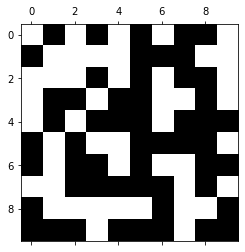

In [17]:
np_array = np.random.randint(0, 2, n*n).reshape(n, n)
block_unblock_matrix = np.asmatrix(np_array)

plt.spy(block_unblock_matrix)

In [18]:
# [[1 for j in range(n)] for i in range(n)]

# hofn_matrix = list(np.array(np.arange(100).reshape((10,10))))
# # np.fliplr(hofn_matrix)

def compute_hofn(n):
    k = 0
    hofn = []
    one_row = []
    for j in range(n):
        one_row.append(k)
        k += 1

    hofn.append(one_row)

    for i in range(n-1):
        one_row = [x+1 for x in one_row]
        hofn.append(one_row)

    hofn_matrix = np.array([np.array(xi) for xi in hofn])
    hofn_matrix = np.flip(hofn_matrix)
    return hofn_matrix

g(n) matrix

In [4]:
def compute_gofn(n):
    k = 0
    gofn = []
    one_row = []
    for j in range(n):
        one_row.append(k)
        k += 1
    gofn.append(one_row)
    for i in range(n-1):
        one_row = [x+1 for x in one_row]
        gofn.append(one_row)

    gofn_matrix = np.array([np.array(xi) for xi in gofn])
    return gofn_matrix

In [5]:
def get_gofn(gofn_matrix, row, col):
    return gofn_matrix[row][col]

In [6]:
def get_hofn(hofn_matrix, row, col):
    return hofn_matrix[row][col]

In [7]:
def get_children(matrix, row, column, n):
    children = []
    if row == 0 and column == 0:
        children.append((row+1,column))
        children.append((row, column+1))
    elif row == n-1 and column == n-1:
        print("goal node doesn't have children")
    elif row == n-1:
        children.append((row, column+1))
    elif column == n-1:
        children.append((row+1, column))
    else:
        children.append((row+1, column))
        children.append((row, column+1))
    return children 

In [8]:
def sort(open_list, gofn_matrix, hofn_matrix):
    sort_dict = {}
    for node in open_list:
        row = node[0]
        col = node[1]
        gofn = gofn_matrix.item(row,col)
        hofn = hofn_matrix.item(row,col)
        print("node", node, " - gofn: ", gofn,  " - hofn: ", hofn)
#         fofn = gofn + hofn
#         print("fofn: ", fofn)
        sort_dict[node] = hofn
        sort_dict = dict(sorted(sort_dict.items(), key=lambda item: item[1]))
    return sort_dict

In [12]:
visited_list = []
open_list = []

start = (0,0)
goal = (n-1, n-1)

open_list.append(start)
# print(open_list)
gofn_matrix = compute_gofn(n)
# print("gofn_matrix", gofn_matrix)
hofn_matrix = compute_hofn(n)
# print("hofn_matrix", hofn_matrix)

while open_list:
    current_node = open_list.pop()
    print("current_node:", current_node)
    if block_unblock_matrix.item(current_node) == 1:
        visited_list.append(current_node)
        children = get_children(block_unblock_matrix, current_node[0], current_node[1], n)
        print("children", children)
        open_list.extend(children)
        sort_dict = sort(open_list, gofn_matrix, hofn_matrix)
        print("sort_dict", sort_dict)
        open_list = list(sort_dict.keys())
        print("updated open list: ", open_list)
        print("---------------------\n")
    else:
        if open_list == []:
            print("There is no path available to goal Node")
            break
        else:
            print("path blocked from", current_node, "backtracking and attempting to Traversing from a different node")

current_node: (0, 0)
children [(1, 0), (0, 1)]
node (1, 0)  - gofn:  1  - hofn:  17
node (0, 1)  - gofn:  1  - hofn:  17
sort_dict {(1, 0): 17, (0, 1): 17}
updated open list:  [(1, 0), (0, 1)]
---------------------

current_node: (0, 1)
children [(1, 1), (0, 2)]
node (1, 0)  - gofn:  1  - hofn:  17
node (1, 1)  - gofn:  2  - hofn:  16
node (0, 2)  - gofn:  2  - hofn:  16
sort_dict {(1, 1): 16, (0, 2): 16, (1, 0): 17}
updated open list:  [(1, 1), (0, 2), (1, 0)]
---------------------

current_node: (1, 0)
children [(2, 0), (1, 1)]
node (1, 1)  - gofn:  2  - hofn:  16
node (0, 2)  - gofn:  2  - hofn:  16
node (2, 0)  - gofn:  2  - hofn:  16
node (1, 1)  - gofn:  2  - hofn:  16
sort_dict {(1, 1): 16, (0, 2): 16, (2, 0): 16}
updated open list:  [(1, 1), (0, 2), (2, 0)]
---------------------

current_node: (2, 0)
children [(3, 0), (2, 1)]
node (1, 1)  - gofn:  2  - hofn:  16
node (0, 2)  - gofn:  2  - hofn:  16
node (3, 0)  - gofn:  3  - hofn:  15
node (2, 1)  - gofn:  3  - hofn:  15
sort_d